In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [4]:
df = pd.read_csv("Amazon Sale Report.csv", encoding = 'Unicode_escape')

In [5]:
df.shape

(128976, 21)

In [7]:
df.head()

index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0  ...       INR  647.62       MUMBAI  MAHARASHTRA         400081.0   
1  ...       INR  406.00    BENGALURU    KARNATAKA         560085.0   
2  ...       INR  329.00  NAVI MUMBAI  MAHARASHTRA         410210.0   
3  ...       INR  753.33   PUDUCHERRY   PUDUCHERRY         605008.0   
4  ...       INR  574.00      CHENNAI   TAMIL NADU         600073.0   

   ship-country    B2B  fulfilled-by New  PendingS  
0            IN  False     Easy Ship NaN       NaN  
1            IN  False     Easy Ship NaN       NaN  
2            IN   True           NaN NaN       NaN  
3            IN  False     Easy Ship NaN       NaN  
4            IN  False           NaN NaN       NaN  

[5 rows x 21 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [10]:
df.drop(['New', 'PendingS'], axis = 1, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [16]:
pd.isnull(df).sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [17]:
df.dropna(inplace = True)

In [18]:
pd.isnull(df).sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [19]:
df.shape

(37514, 19)

In [20]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [21]:
df.rename(columns= {'Qty': 'Quantity'})

index             Order ID        Date                        Status  \
0            0  405-8078784-5731545    04-30-22                     Cancelled   
1            1  171-9198151-1101146    04-30-22  Shipped - Delivered to Buyer   
3            3  403-9615377-8133951    04-30-22                     Cancelled   
7            7  406-7807733-3785945    04-30-22  Shipped - Delivered to Buyer   
12          12  405-5513694-8146768    04-30-22  Shipped - Delivered to Buyer   
...        ...                  ...         ...                           ...   
128875  128874  405-4724097-1016369  06-01-2022  Shipped - Delivered to Buyer   
128876  128875  403-9524128-9243508  06-01-2022                     Cancelled   
128888  128887  405-6493630-8542756    05-31-22  Shipped - Delivered to Buyer   
128891  128890  407-0116398-1810752    05-31-22                     Cancelled   
128892  128891  403-0317423-9322704    05-31-22  Shipped - Delivered to Buyer   

       Fulfilment Sales Channel ship-service-level  Category  Size  \
0        Merchant     Amazon.in           Standard   T-shirt     S   
1        Merchant     Amazon.in           Standard     Shirt   3XL   
3        Merchant     Amazon.in           Standard   Blazzer     L   
7        Merchant     Amazon.in           Standard     Shirt     S   
12       Merchant     Amazon.in           Standard     Shirt    XS   
...           ...           ...                ...       ...   ...   
128875   Merchant     Amazon.in           Standard   T-shirt     S   
128876   Merchant     Amazon.in           Standard   Blazzer    XL   
128888   Merchant     Amazon.in           Standard  Trousers     M   
128891   Merchant     Amazon.in           Standard    Wallet  Free   
128892   Merchant     Amazon.in           Standard   Blazzer     M   

       Courier Status  Quantity currency  Amount       ship-city  \
0          On the Way         0      INR  647.62          MUMBAI   
1             Shipped         1      INR  406.00       BENGALURU   
3          On the Way         0      INR  753.33      PUDUCHERRY   
7             Shipped         1      INR  399.00       HYDERABAD   
12            Shipped         1      INR  399.00       Amravati.   
...               ...       ...      ...     ...             ...   
128875        Shipped         1      INR  854.00           ALLUR   
128876     On the Way         0      INR  734.29       Barabanki   
128888        Shipped         1      INR  518.00           NOIDA   
128891     On the Way         0      INR  398.10         MADURAI   
128892        Shipped         1      INR  721.00  UTTAR BAGDOGRA   

            ship-state  ship-postal-code ship-country    B2B fulfilled-by  
0          MAHARASHTRA          400081.0           IN  False    Easy Ship  
1            KARNATAKA          560085.0           IN  False    Easy Ship  
3           PUDUCHERRY          605008.0           IN  False    Easy Ship  
7            TELANGANA          500032.0           IN  False    Easy Ship  
12         MAHARASHTRA          444606.0           IN  False    Easy Ship  
...                ...               ...          ...    ...          ...  
128875  ANDHRA PRADESH          524315.0           IN  False    Easy Ship  
128876   UTTAR PRADESH          225001.0           IN  False    Easy Ship  
128888   UTTAR PRADESH          201301.0           IN  False    Easy Ship  
128891      TAMIL NADU          625007.0           IN  False    Easy Ship  
128892     WEST BENGAL          734014.0           IN  False    Easy Ship  

[37514 rows x 19 columns]

In [22]:
df.describe()

index           Qty        Amount  ship-postal-code
count   37514.000000  37514.000000  37514.000000      37514.000000
mean    60953.809858      0.867383    646.553960     463291.552754
std     36844.853039      0.354160    279.952414     194550.425637
min         0.000000      0.000000      0.000000     110001.000000
25%     27235.250000      1.000000    458.000000     370465.000000
50%     63470.500000      1.000000    629.000000     500019.000000
75%     91790.750000      1.000000    771.000000     600042.000000
max    128891.000000      5.000000   5495.000000     989898.000000

In [23]:
df.describe(include = 'object')

Order ID      Date                        Status  \
count                 37514     37514                         37514   
unique                34664        91                            11   
top     171-5057375-2831560  04-25-22  Shipped - Delivered to Buyer   
freq                     12       697                         28741   

       Fulfilment Sales Channel ship-service-level Category   Size  \
count       37514         37514              37514    37514  37514   
unique          1             1                  1        8     11   
top      Merchant     Amazon.in           Standard  T-shirt      M   
freq        37514         37514              37514    14062   6806   

       Courier Status currency  ship-city   ship-state ship-country  \
count           37514    37514      37514        37514        37514   
unique              3        1       4698           58            1   
top           Shipped      INR  BENGALURU  MAHARASHTRA           IN   
freq            31859    37514       2839         6236        37514   

       fulfilled-by  
count         37514  
unique            1  
top       Easy Ship  
freq          37514

In [26]:
df[['Qty','Amount']].describe()

Qty        Amount
count  37514.000000  37514.000000
mean       0.867383    646.553960
std        0.354160    279.952414
min        0.000000      0.000000
25%        1.000000    458.000000
50%        1.000000    629.000000
75%        1.000000    771.000000
max        5.000000   5495.000000

# Lets do some eda part hahaha

In [29]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

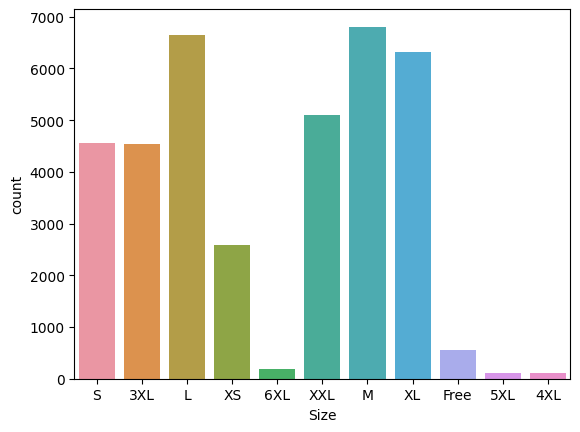

In [31]:
df2 = sns.countplot(x = 'Size', data = df)

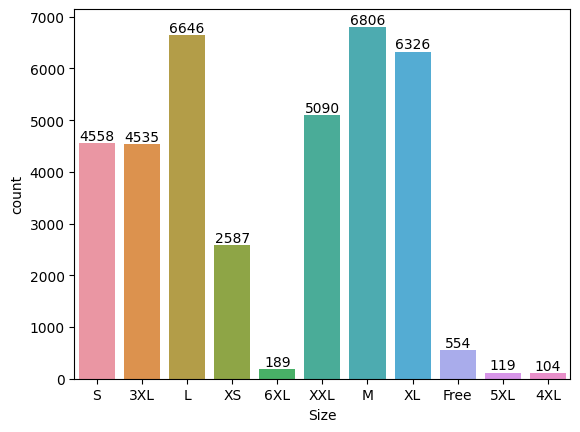

In [32]:
df2 = sns.countplot(x = 'Size', data = df)

for bars in df2.containers:
    df2.bar_label(bars)

In [34]:
df3 = df.groupby(['Size'], as_index = False)['Qty'].sum().sort_values(by = 'Qty', ascending = False)

In [35]:
df3

Size   Qty
6      M  5905
5      L  5795
8     XL  5481
10   XXL  4465
0    3XL  3972
7      S  3896
9     XS  2191
4   Free   467
3    6XL   170
2    5XL   104
1    4XL    93

<Axes: xlabel='Size', ylabel='Qty'>

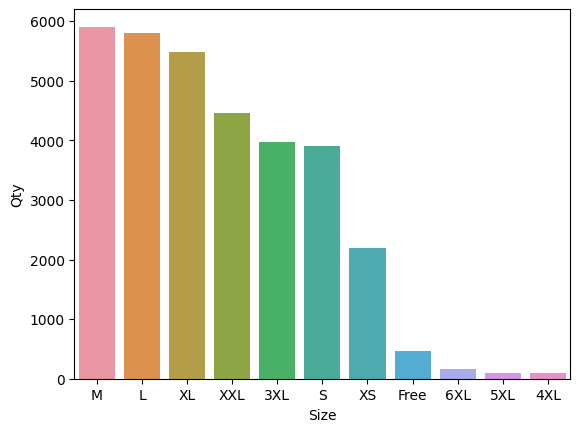

In [36]:
sns.barplot(x = 'Size', y = 'Qty', data = df3)

<Axes: xlabel='Courier Status', ylabel='count'>

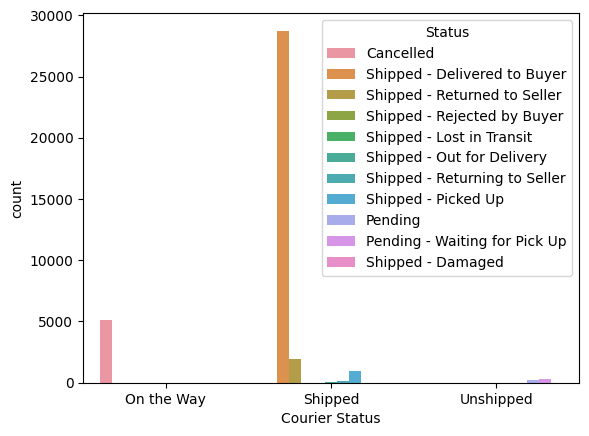

In [38]:
sns.countplot(data = df, x = 'Courier Status', hue = 'Status')

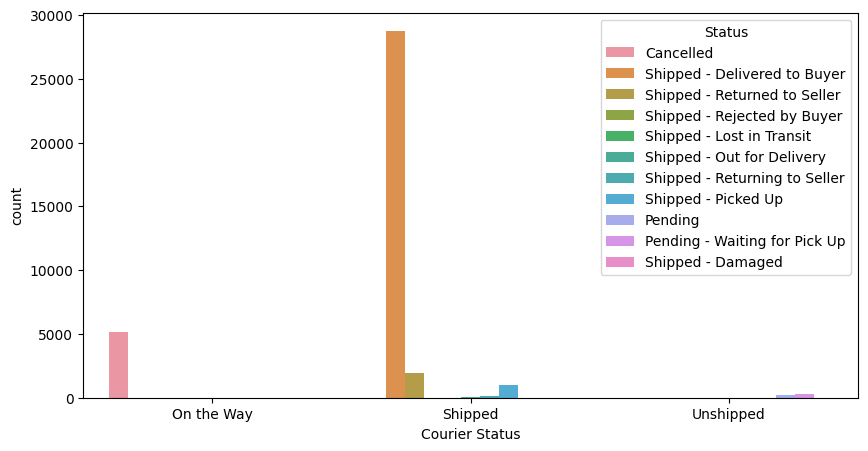

In [41]:
plt.figure(figsize = (10,5))

df4 = sns.countplot(data = df, x = 'Courier Status', hue = 'Status')
plt.show()

<Axes: >

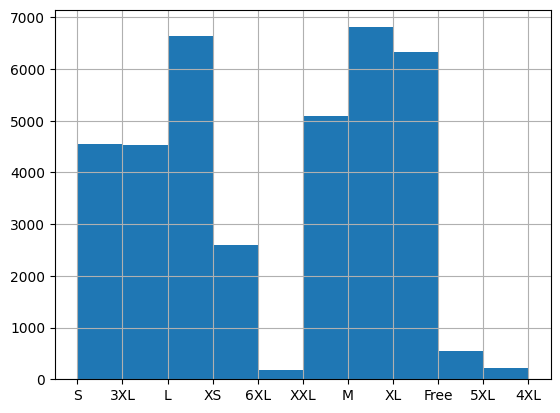

In [43]:
df['Size'].hist()

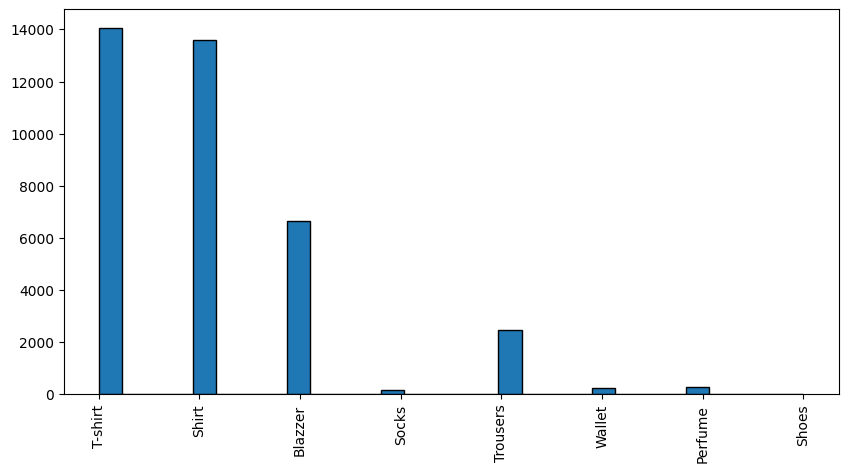

In [44]:
df['Category'] = df['Category'].astype(str)
column_data = df['Category']
plt.figure(figsize=(10, 5))
plt.hist(column_data, bins=30, edgecolor='Black')
plt.xticks(rotation=90)
plt.show()

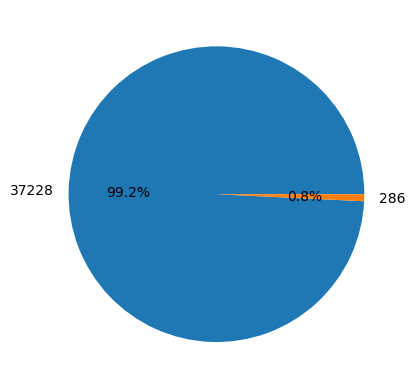

In [45]:
# Checking B2B Data  by using pie chart 
B2B_Check = df['B2B'].value_counts()

#  Plot the pie chart
plt.pie(B2B_Check, labels=B2B_Check, autopct='%1.1f%%')
#plt.axis('equal')
plt.show()

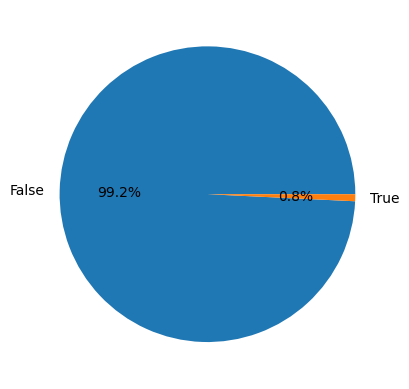

In [46]:
# Checking B2B Data  by using pie chart 
B2B_Check = df['B2B'].value_counts()

#  Plot the pie chart
plt.pie(B2B_Check, labels=B2B_Check.index, autopct='%1.1f%%')
#plt.axis('equal')
plt.show()

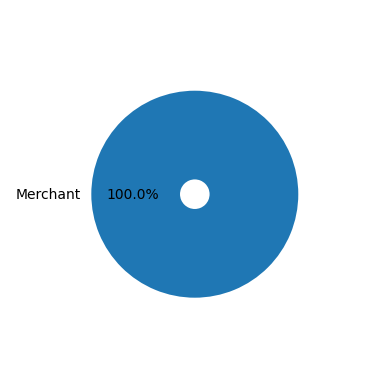

In [47]:
#  Prepare data for pie chart
a1 = df['Fulfilment'].value_counts()

# Step 4: Plot the pie chart
fig, ax = plt.subplots()

ax.pie(a1, labels=a1.index, autopct='%1.1f%%', radius=0.7, wedgeprops=dict(width=0.6))
ax.set(aspect="equal")

plt.show()

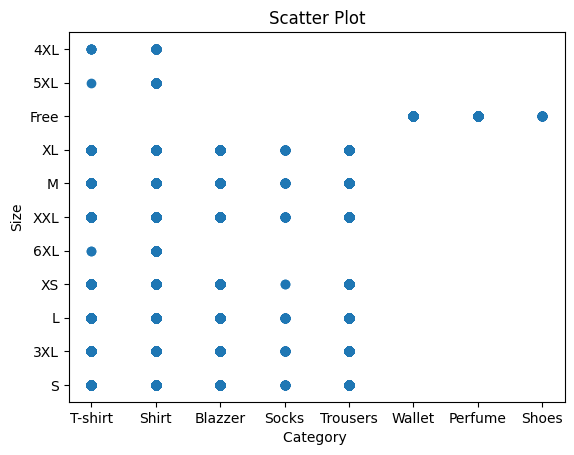

In [48]:
x_data = df['Category']  
y_data = df['Size'] 

# Plot the scatter plot
plt.scatter(x_data, y_data)
plt.xlabel('Category ')  
plt.ylabel('Size')  
plt.title('Scatter Plot') 
plt.show()

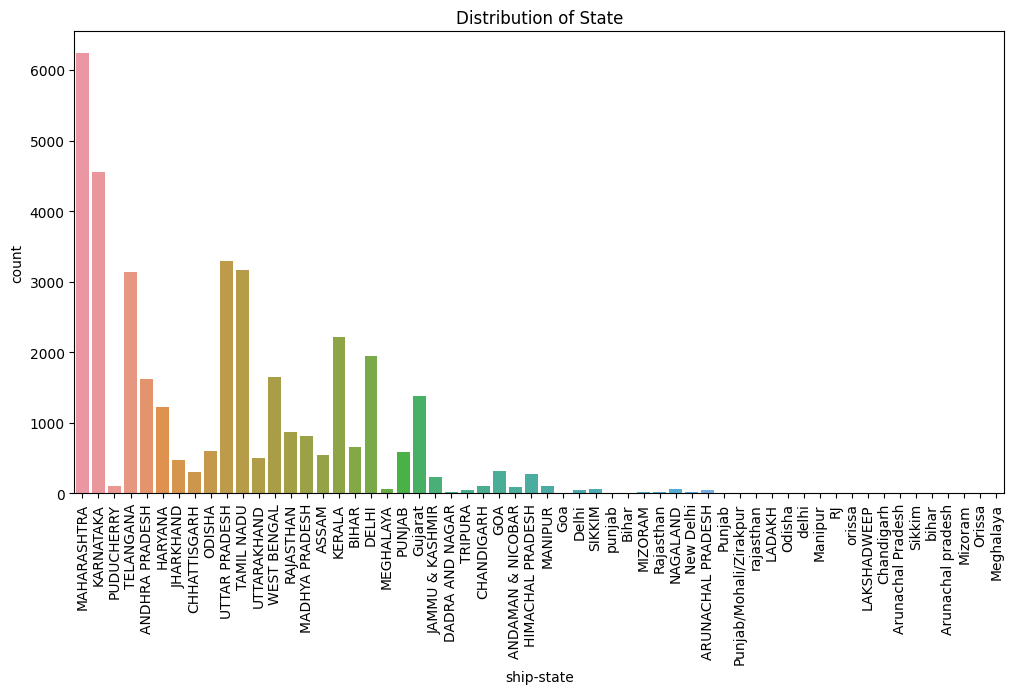

In [53]:

# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()


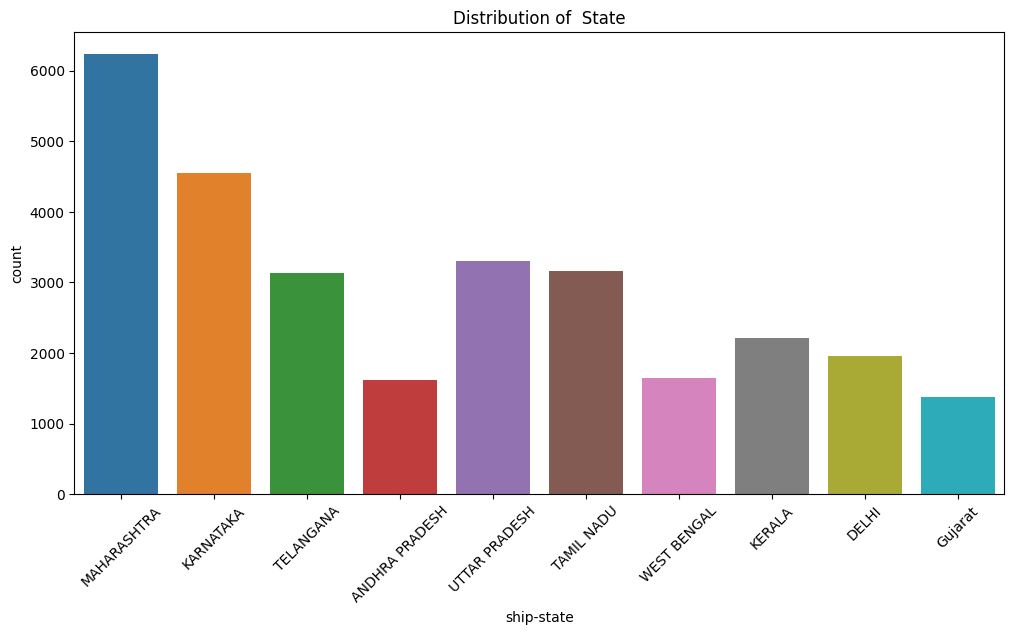

In [54]:
# top_10_States 
top_10_state = df['ship-state'].value_counts().head(10)
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)], x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of  State')
plt.xticks(rotation=45)
plt.show()

Report:-
The data analysis reveals that the business has a significant customer base in Maharashtra state, mainly serves retailers, fulfills orders through Amazon, experiences high demand for T-shirts, and sees M-Size as the preferred choice among buyers.